Entity Recognision (PERSON, LOCATION OR ADDRESS, CONTACT, ORGANIZATION)

In [1]:
import nltk
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

ADDRESS AND PESON DETECTOR.. (ENTITY DETECOT)

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

post = 'the name of the boy is ahmed, adam and james and live in No.5 adex street he contact is +971 55 1234567 651 N Broad St, New Castle, Delaware, United States of America'
post2 = 'the name of the boy is ahmed, adam and james and live in No.5 adex street he contact is +971 55 1234567 651 N Broad St, New Castle, Delaware, United States of America'

import spacy

# this function is capable of detecting address, person name, organization and some contact
def get_entities(posts):

    post_entity_diction = {}
    for post in posts:
        # loading of spacy model
        nlp_model = spacy.load('en_core_web_sm')

        # padding comment to model
        doc = nlp_model(post)

        # going throught the entity
        for ent in doc.ents: 
    

            if ent.label_ == 'DATE' or ent.label_ == 'CARDINAL': 
                pass
            else: 
                if post_entity_diction.get(ent.label_) != None: 
                    post_entity_diction[ent.label_].append(ent.text)
                else: 
                    post_entity_diction[ent.label_] = []
                    post_entity_diction[ent.label_].append(ent.text)
    return post_entity_diction

post_entity = get_entities([post, post2])
post_entity

{'PERSON': ['james', 'james'],
 'GPE': ['New Castle',
  'Delaware',
  'United States of America',
  'New Castle',
  'Delaware',
  'United States of America']}

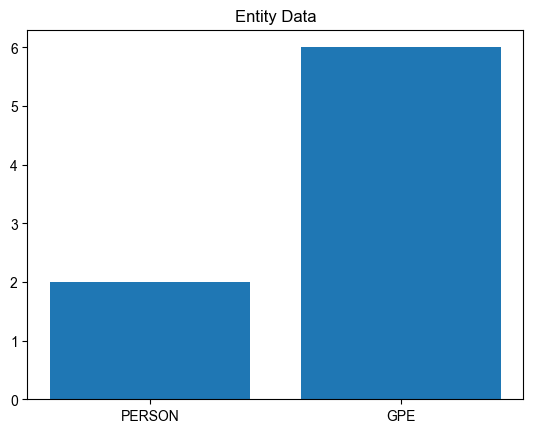

In [7]:
import seaborn as sn
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib  import style

# print(style.available)

post_entity_visual = {}
for key, val in post_entity.items():
    post_entity_visual[key] = len(val)

def show_bar_chat(diction, title):
    plt.title(title)
    # plt.figure(figsize=(4,4))
    plt.style.use('seaborn-v0_8-dark')
    fig , ax = plt.bar(diction.keys(), diction.values(), )
    plt.show()

show_bar_chat(post_entity_visual, 'Entity Data')

UAI CONTACT MATCH AND EMAIL RECOGNIZER... 

In [11]:
# BASE LINE PHONE MATCHER
import re
'+971 2 1234567 and +971 50 9876543 are valid  +971 8 5555555 UAE phone numbers, but not +971 1 5555555 or +971 55 1234567 and my email is hamad1076663@gmail.com.'
post = 'the name of the boy is ahmed, adam and james and email contack  +971 8 5555555 +971 5 9876543   +971 2 1234567'

def contact_email_detector(post):
    contact_diction = {}
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
    uai_phone_pattern = r"\+971 [2355679]\d{1} \d{7}|\+971[2355679]\d{1}\d{7}"
    text = "+971 2 1234567 and +971509876543 are valid  +971 8 5555555 UAE phone numbers, but not +971 1 5555555 or +971 55 1234567 and my email is hamad1076663@gmail.com."


    matches = re.findall(uai_phone_pattern, text)
    contact_diction['contact'] = matches
    emails =  re.findall(email_pattern, text)
    contact_diction['emails'] = emails

    return contact_diction

contact_data = contact_email_detector(post)
contact_data

{'contact': ['+971509876543', '+971 55 1234567'],
 'emails': ['hamad1076663@gmail.com']}

In [26]:
import re
# getting contact and email pattern from post...
def contact_email_detector(posts):
    contact_diction = {'post_id':[], 'contacts':[] , 'emails':[]}
    counter = 0
    for post in posts: 
        counter += 1
        email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
        uai_phone_pattern = r"\+971 [2355679]\d{1} \d{7}"


        matches = re.findall(uai_phone_pattern, post)
        contact_diction['contacts'].append(matches)
        emails =  re.findall(email_pattern, post)
        contact_diction['emails'].append(emails)

        contact_diction['post_id'].append('Post {}'.format(counter))
        

    return contact_diction


post1 = '+971 2 1234567 and +971 50 9876543 are valid  +971 8 5555555 UAE phone numbers, but not +971 1 5555555 or +971 55 1234567 and my email is hamad1076663@gmail.com.'
post2 = 'the name of the boy is ahmed, adam and james and email contack  +971 8 5555555 +971 5 9876543   +971 2 1234567'
contact_data = contact_email_detector([post1, post2])
print(contact_data)



{'post_id': ['Post 1', 'Post 2'], 'contacts': [['+971 50 9876543', '+971 55 1234567'], []], 'emails': [['hamad1076663@gmail.com'], []]}


CALCULATING PROFILE DATA VULNERABILITY EXPOSURE

In [9]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import json
import string

pt_stem = PorterStemmer()
st = stopwords.words('english')

# cleaning text ===> removal of punctuation, stemming and stopword removal 
def clean_dataset(dataset):

    token_word = [word.lower() for word in word_tokenize(dataset)]
    clean_word = [token for token in token_word if not token in st]
    clean_word = ' '.join([cl_word for cl_word in clean_word if not cl_word in string.punctuation])

    return clean_word

comment = 'the name of the boy is ahmed, hamad1076663@gmail.com adam and james and email contack  +971 8 5555555 +971 5 9876543   +971 2 1234567'


def get_facebook_profile():
    with open('profile.json', 'r') as file: 
        data = json.load(file)
    return data


profile_dict = get_facebook_profile()
profile_dict



# profile vulnerability calculation
def personal_data_vulnerability_score(profile, comment):
    prof_data = []
    for k,v in profile.items():
        if(type(v) == str):
            prof_data.append(v.lower())

    count_data = ' '.join(prof_data)
    print(count_data)

    # clean comement.. and post
    comment = clean_dataset(comment).split()

    # clean user profile
    prof_data = clean_dataset(count_data).split()

    prob_count = 0
    for com in comment: 
        # print(com)
        if com.lower() in prof_data: 
            prob_count += 1

    if len(profile) == 0: 
        return 0 
    else: 
        return prob_count/len(prof_data)


personal_data_vulnerability_score(profile_dict, comment)

100091362595291 hamad alsuwaidi add work
dubai electricity and water authority - dewa
shift manager
dubai, united arab emirates
more options abu dhabi, united arab emirates hamad1076663@gmail.com +971 50 561 1160 male april 11, 1998 add a nickname, a birth name... add a relationship status add family member write about yourself 2023
grew up in abu dhabi, united arab emirates


0.11764705882352941

sentiment analysis

## sentiment Analysis model

dataset download link
https://www.kaggle.com/datasets/yrastogi13/dataset-for-sentiment-analysis

In [2]:
import pandas as pd 

# loading data
dt1 = pd.read_csv('sentiment_dataset/sent_data.csv')
dt2 = pd.read_csv('sentiment_dataset/sent_data_two.csv')

# merging dataset into single table
dataset = pd.concat([dt1, dt2], ignore_index=True)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
# showing columns
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [4]:
# showing number of rows and columns... 
r, c = dataset.shape
print("rows : {} |  Columns : {}".format(r, c))

rows : 2630 |  Columns : 2


In [5]:
# show some smaple content......
dataset.Review.sample(4)

1858    The pancake was also really good and pretty la...
2443    The service was great, even the manager came a...
551                                        Nice ambiance.
1158    i think hanuman had a gay crush on ram what do...
Name: Review, dtype: object

In [6]:
# show some smaple content......
dataset.Review.sample(4)

1298    hindutva is not only a religion it is a cultur...
350     We sat another ten minutes and finally gave up...
1529    So don't go there if you are looking for good ...
742     I'm not sure how long we stood there but it wa...
Name: Review, dtype: object

In [10]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string

pt_stem = PorterStemmer()
st = stopwords.words('english')

# cleaning text ===> removal of punctuation, stemming and stopword removal 
def clean_dataset(dataset):

    token_word = [word.lower() for word in word_tokenize(dataset)]
    clean_word = [token for token in token_word if not token in st]
    clean_word = ' '.join([cl_word for cl_word in clean_word if not cl_word in string.punctuation])

    return clean_word


# create clean data columns
dataset['clean_data'] = dataset['Review'].apply(lambda data : clean_dataset(data))
dataset.head()

,Review,Liked,clean_data
0,Wow... Loved this place.,1,wow ... loved place
1,Crust is not good.,0,crust good
2,Not tasty and the texture was just nasty.,0,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,selection menu great prices


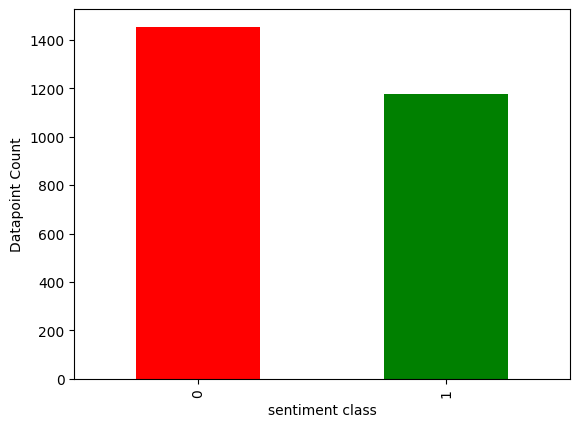

In [7]:
import matplotlib.pyplot as plt
dataset.Liked.value_counts().plot(kind='bar', color=['red', 'green'])
plt.xlabel('sentiment class')
plt.ylabel('Datapoint Count')
plt.show()

Splitting Data

In [8]:
fn_data = dataset[['Liked', 'clean_data']]
fn_data.head(4)

,Liked,clean_data
0,1,wow ... loved place
1,0,crust good
2,0,tasty texture nasty
3,1,stopped late may bank holiday rick steve recom...


In [9]:
from sklearn import model_selection

X =  fn_data.clean_data 
y = fn_data.Liked

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size=0.15, random_state=10)

print('training size {}'.format(len(X_train)))
print('Testing size  {}'.format(len(X_test)))

training size 2235
Testing size  395


Vectorizing (is to covert those text to numbers)

In [18]:
#  the label 0 ===> Negative sentiment  |||||||  1 ==> postive sentiment
from sklearn.feature_extraction import text

tfidf = text.TfidfVectorizer()

# vectorizing the clean_text into numerical data 
Xtrain_vector =tfidf.fit_transform(X_train)
Xtest_vector = tfidf.transform(X_test)

In [19]:
import joblib

joblib.dump(tfidf,'tfidf_sentiment_vocab.pk',)

['tfidf_sentiment_vocab.pk']

In [20]:
Xtest_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Naive Bayes Machine Leanring Model (Sentiment Analyzer)

In [21]:
from sklearn.naive_bayes import GaussianNB

# model initializaing and training 
nb_model = GaussianNB()
nb_model.fit(Xtrain_vector.toarray(), y_train)

GaussianNB()

In [22]:
# saving model 
joblib.dump(nb_model, 'naive_bayes_sentiment_analyzer_model.jb')

['naive_bayes_sentiment_analyzer_model.jb']

 Score 0.8962025316455696
________________________________________________________
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       222
           1       0.85      0.92      0.89       173

    accuracy                           0.90       395
   macro avg       0.89      0.90      0.90       395
weighted avg       0.90      0.90      0.90       395

________________________________________________________
Axes(0.125,0.11;0.62x0.77)


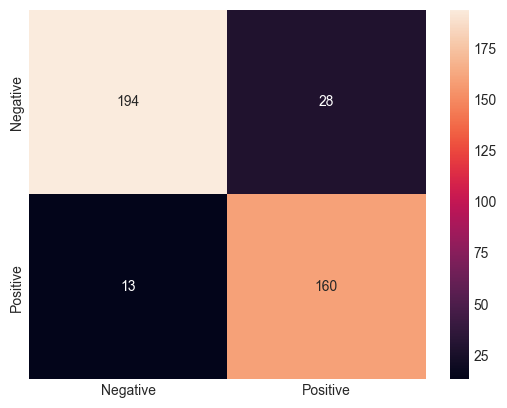

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn 

# 
labels = ['Negative', 'Positive']
# 
model_score = nb_model.score(Xtest_vector.toarray(), y_test)
print(' Score {}'.format(model_score))

x_prediction = nb_model.predict(Xtest_vector.toarray())
class_score = classification_report(y_test, x_prediction)
confusion_score = confusion_matrix(y_test, x_prediction)
print('________________________________________________________')
print(class_score)

print('________________________________________________________')
print(sn.heatmap(confusion_score, annot=True , fmt='d', xticklabels=labels, yticklabels=labels))

user interaction pipeline

In [14]:
# data = input(":")
import joblib


input_text = 'congratulation this is realy good'

# return sentiment from text
def sentiment_analyzer(text, model):
    # clean data
    clean_data = clean_dataset(text)

    # loading tfid model .... 
    tfid = joblib.load('tfidf_sentiment_vocab.pk')

    # vectorizing
    word_vector = tfid.transform([clean_data])

    # load_model
    sentiment_model = model
    # make prediction
    predict = sentiment_model.predict(word_vector.toarray())

    sent_string = ''

    if predict[0] != 0:
        sent_string = 'Negative Sentiment'
    else: 
        sent_string = 'Postive Sentiment'


    return sent_string, predict[0]  


# load model ....
model = joblib.load('naive_bayes_sentiment_analyzer_model.jb')
sentiment_analyzer(input('Enter Text :'), model)



('Negative Sentiment', 1)

In [25]:

# # Use a Streamlit text input widget to get the location
# location = st.text_input("Enter a location")
# location = input('Location:')

## GOOGLE MAP LOCATION

In [3]:
data.keys()

dict_keys(['place', 'name', 'lat', 'lon', 'importance'])

In [2]:
import pandas as pd 
import streamlit as st
import requests
def get_google_location(location): 
    location_corpus = {
        'place':[], 
        'name':[], 
        'lat':[], 
        'lon':[], 
        'importance':[]
    }
    # Use OpenStreetMap Nominatim API to get the latitude and longitude coordinates
    url = f"https://nominatim.openstreetmap.org/search?q={location}&format=json"
    location_data = requests.get(url).json()
#     print(location_data[0].keys())
    if location_data != []: 
        
        print('possible location for  {} ==> {}'.format(location, len(location_data)))
        for location in location_data: 
            location_corpus['place'].append(location['place_id'])
            location_corpus['name'].append(location['display_name'])
            location_corpus['lat'].append(location['lat'])
            location_corpus['lon'].append(location['lon'])
            location_corpus['importance'].append(location['importance'])
    else: 
        print('location not detected... ')
    
    return location_corpus 
data = get_google_location(input('Enter a location:'))
# print(data[0])

Enter a location: dubai


possible location for  dubai ==> 10


In [6]:
import pandas as pd 
pd.DataFrame(data)

,place,name,lat,lon,importance
0,308398371,"دبي, الإمارات العربية المتحدة",25.074282349999997,55.18853865430702,0.641621
1,309698817,"دبي, الإمارات العربية المتحدة",25.2653471,55.2924914,0.641621
2,308230703,"دبي, الإمارات العربية المتحدة",25.074282349999997,55.18853865430702,0.552594
3,309052277,"Dubai (zone), Makindye II, Makindye, Kampala C...",0.2776961,32.579948,0.375010
4,94598176,"Dubai, Kampala, Central Region, Uganda",0.2786339,32.5798768,0.375010
5,13337999,"Dubai, Buurhakaba بورحكب, Buur Hakaba بورحكب, ...",2.80168,44.08159,0.375010
6,58372246,"Dubai, Ajia, Arua, Northern Region, Uganda",2.9470179,30.961206,0.375010
7,97829067,"Dubai, Nakuru, Kenya",-0.2746231,36.1698277,0.375010
8,348688989,"Al Salam, Mudon, Dubai, مُدُن, دبي, الإمارات ا...",25.0265946,55.269940277484366,0.300010
9,348686164,"Sama Townhouses, Town Square, Dubai, Al Yalayi...",24.99899255,55.291584083057344,0.300010


In [16]:
# import re

# pattern = r"\+971 [2355679]\d{1} \d{7}"
# text = "+971 2 1234567 and +971 50 9876543 are valid UAE phone numbers, but not +971 1 5555555 or +971 55 1234567."

# matches = re.findall(pattern, text)
# print(matches)

# import re

# pattern = r"\+971 [2345679] \d{7}"
# phone_numbers = ["+971 2 1234567", "+971 50 9876543", "+971 8 5555555"]
# for number in phone_numbers:
#     if re.match(pattern, number):
#         print(number, "is a valid UAE phone number.")
#     else:
#         print(number, "is not a valid UAE phone number.")


# from spacy import displacy
# import json

# text = 'the name of the boy is ahmed, adam and james and live in No.5 adex street he contact is +971 8 5555555 +971 5 9876543   +971 2 1234567'


# # doc = sentence11
# text = 'the name of the boy is ahmed, adam and james and live in No.5 adex street he contact is +971 55 1234567 651 N Broad St, New Castle, Delaware, United States of America'

# doc2 = nlp_model(text)
# displacy.render(doc2, style="ent", jupyter=True)
# doc = nlp_model(sentence11)
# displacy.render(doc, style="ent", jupyter=True)
import streamlit as st
import pandas as pd
import numpy as np

df = pd.DataFrame(
    np.random.randn(1000, 2) / [50, 50] + [37.76, -122.4],
    columns=['lat', 'lon'])


df

,lat,lon
0,37.748465,-122.370787
1,37.767898,-122.386042
2,37.754869,-122.416009
3,37.775332,-122.406765
4,37.772748,-122.398311
...,...,...
995,37.754803,-122.382935
996,37.736742,-122.375330
997,37.760106,-122.402572
998,37.753294,-122.378345
